In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [50]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [4]:
print(im_org.shape)

(512, 512)


In [5]:
print(im_org.dtype)

uint8


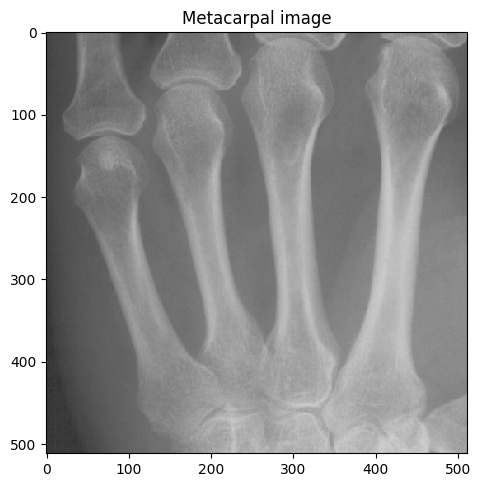

In [6]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

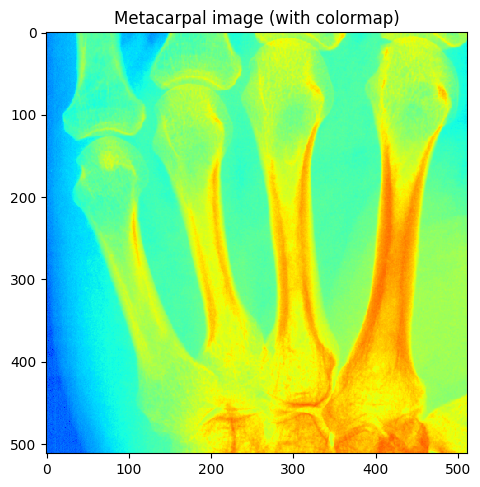

In [7]:
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

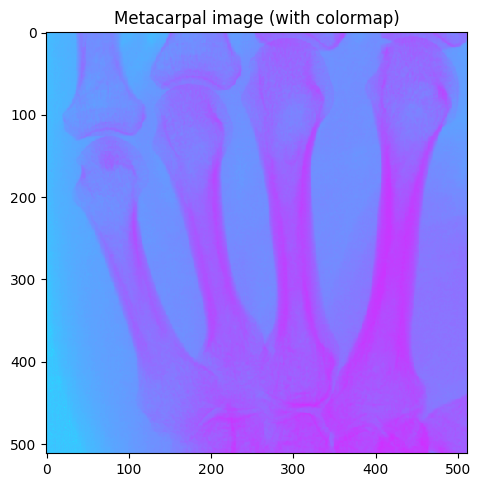

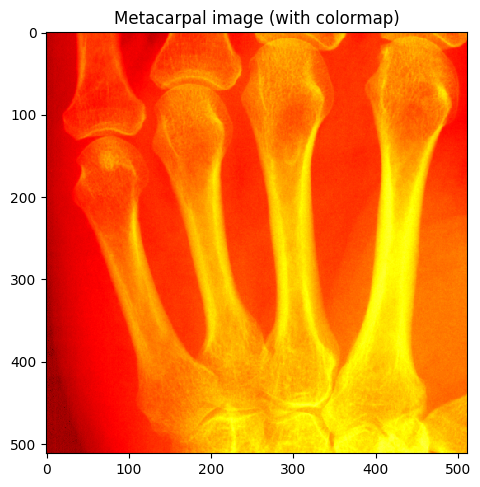

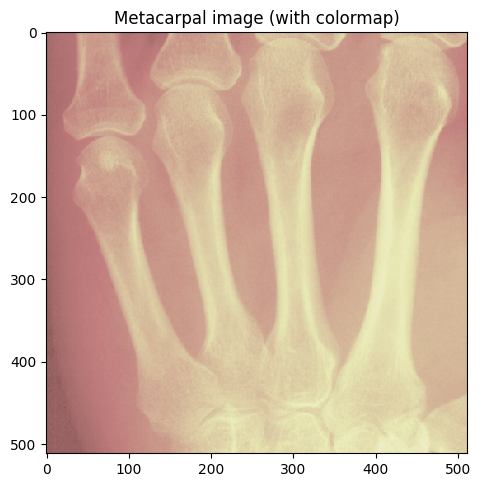

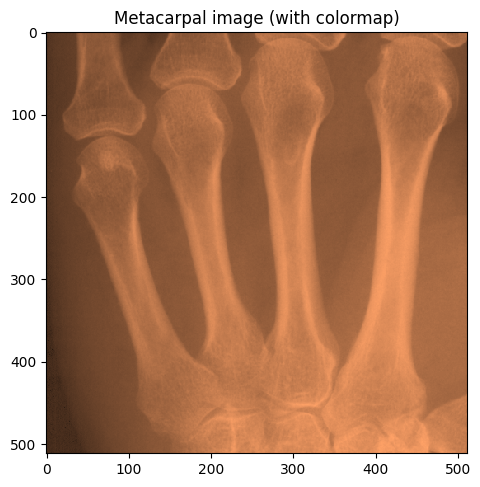

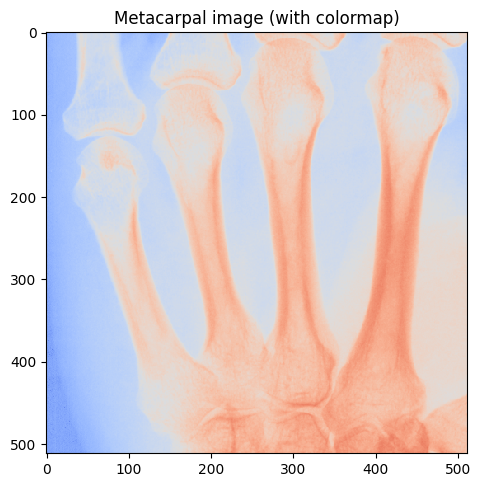

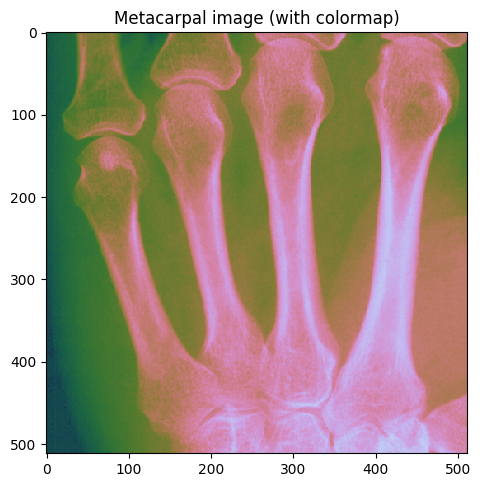

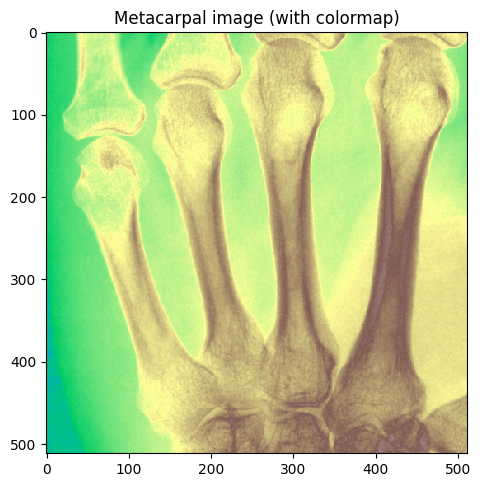

In [8]:
io.imshow(im_org, cmap="cool")
plt.title('Metacarpal image (with colormap)')
io.show()

io.imshow(im_org, cmap="hot")
plt.title('Metacarpal image (with colormap)')
io.show()

io.imshow(im_org, cmap="pink")
plt.title('Metacarpal image (with colormap)')
io.show()

io.imshow(im_org, cmap="copper")
plt.title('Metacarpal image (with colormap)')
io.show()

io.imshow(im_org, cmap="coolwarm")
plt.title('Metacarpal image (with colormap)')
io.show()
io.imshow(im_org, cmap="cubehelix")
plt.title('Metacarpal image (with colormap)')
io.show()
io.imshow(im_org, cmap="terrain")
plt.title('Metacarpal image (with colormap)')
io.show()

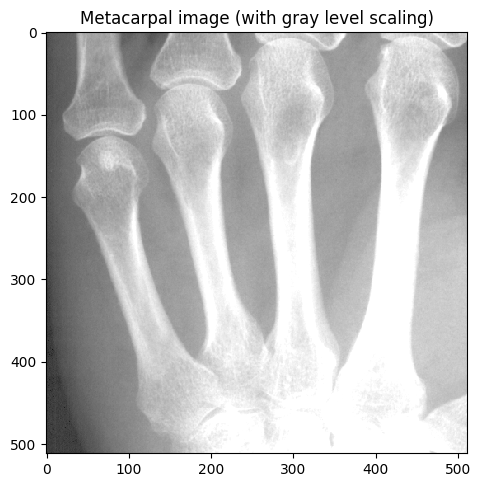

In [9]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

In [15]:
im_org.min(), im_org.max()

(32, 208)

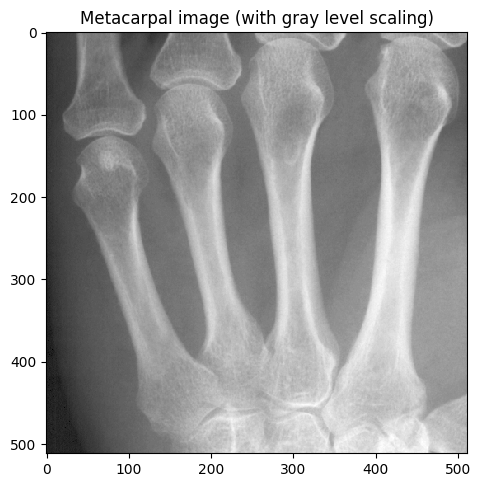

In [16]:
io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Metacarpal image (with gray level scaling)')
io.show()

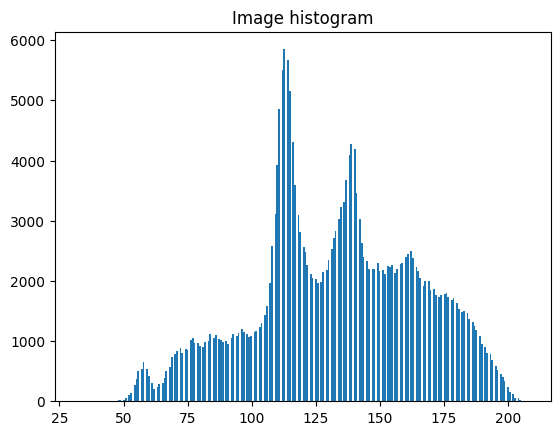

In [17]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

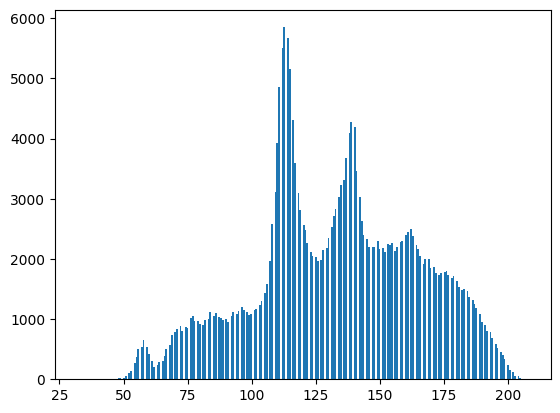

In [18]:
h = plt.hist(im_org.ravel(), bins=256)

In [30]:
bin_no = 117
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 5848.0 pixel values in bin 117


In [31]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 112.4375 to 113.125


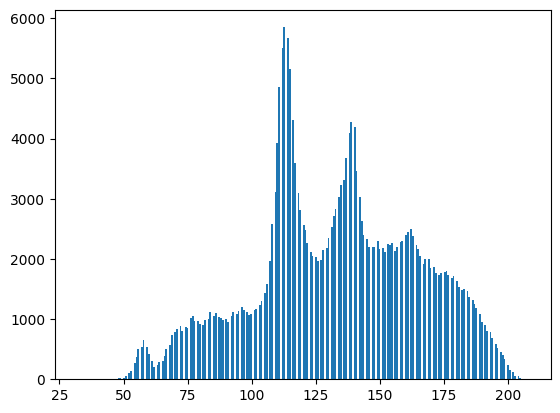

In [21]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

In [33]:
y.argmax(), y.max()

(117, 5848.0)

In [34]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


In [35]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


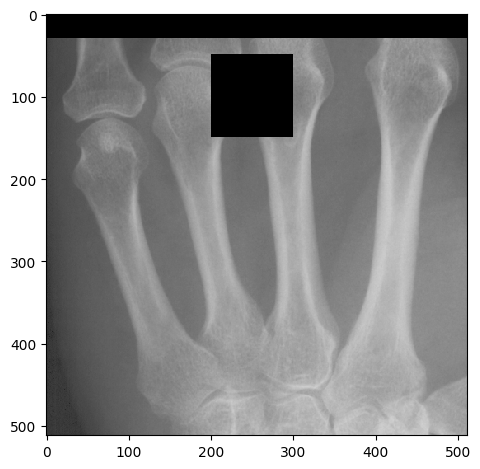

In [49]:
im_org[:30] = 0
io.imshow(im_org)
io.show()

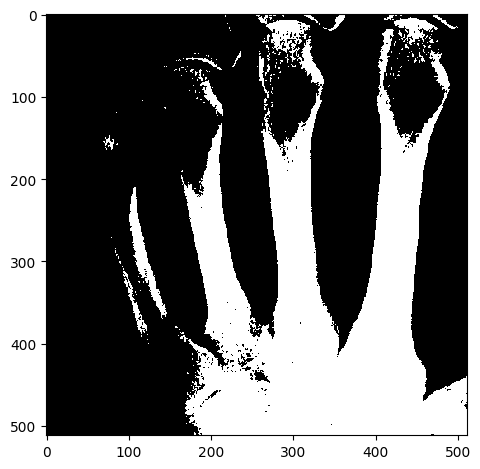

In [51]:
mask = im_org > 150
io.imshow(mask)
io.show()

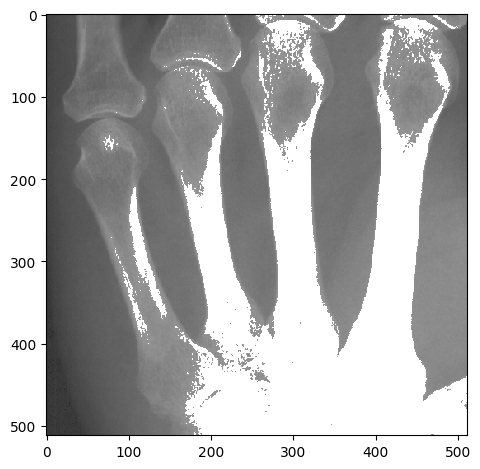

In [52]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

In [74]:
col_img = io.imread(in_dir + "ardeche.jpg")

In [54]:
col_img.shape

(600, 800, 3)

In [55]:
col_img.dtype

dtype('uint8')

In [56]:
col_img[110,90]

array([119, 178, 238], dtype=uint8)

In [58]:
r = 110
c = 90
col_img[r, c] = [255, 0, 0]

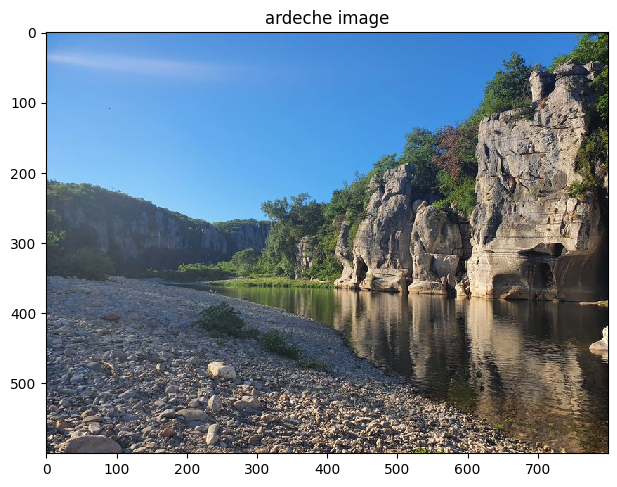

In [60]:
io.imshow(col_img)
plt.title('ardeche image')
io.show()

In [75]:
col_img2 = col_img.copy()
col_img2[:300] = [0,255,0]

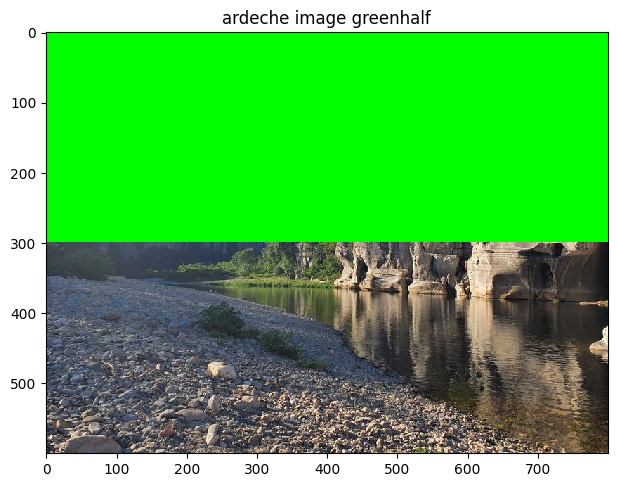

In [77]:
io.imshow(col_img2)
plt.title('ardeche image greenhalf')
io.show()

In [79]:
myim = io.imread('data/own.jpg')

In [82]:
myim.shape, myim.dtype

((768, 1024, 3), dtype('uint8'))

In [83]:
image_rescaled = rescale(myim, 0.25, anti_aliasing=True,
                         channel_axis=2)

In [85]:
image_rescaled.dtype

dtype('float64')

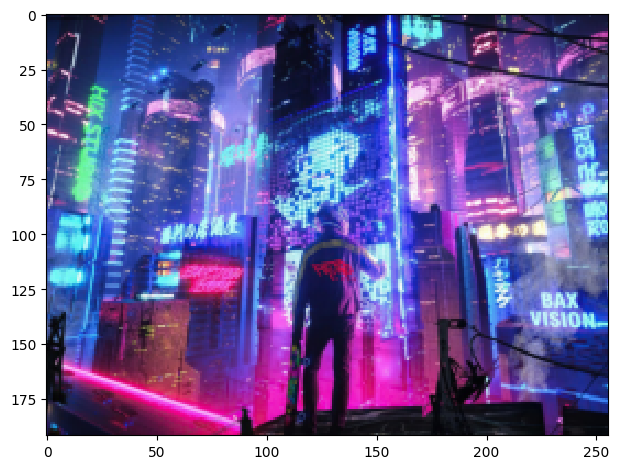

In [88]:
io.imshow(image_rescaled)

In [89]:
image_resized = resize(myim, (myim.shape[0] // 4,
                       myim.shape[1] // 6),
                       anti_aliasing=True)

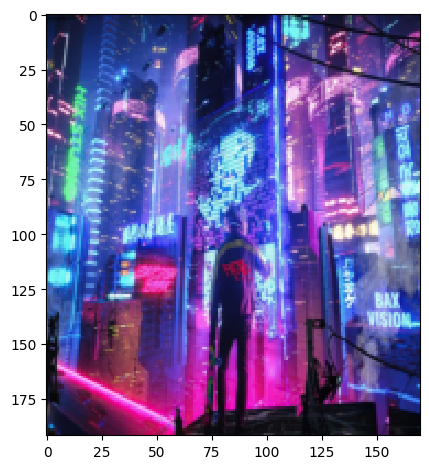

In [90]:
io.imshow(image_resized)

In [91]:
image_rescaled2 = rescale(myim, 400/ myim.shape[1], anti_aliasing=True,
                         channel_axis=2)

In [92]:
image_rescaled2.shape

(300, 400, 3)

In [93]:
im_gray = color.rgb2gray(myim)
im_byte = img_as_ubyte(im_gray)

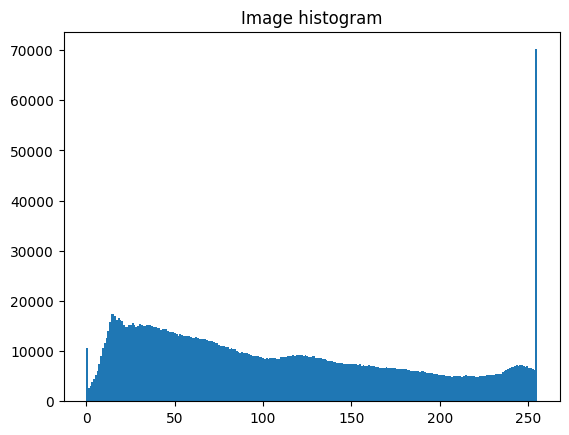

In [96]:
plt.hist(myim.ravel(), bins=256)
plt.title('Image histogram')
io.show()

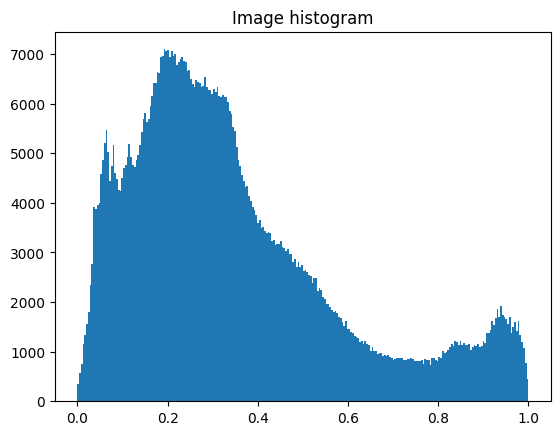

In [95]:
plt.hist(im_gray.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [98]:
dark = io.imread('data/mydark.jpg')
light = io.imread('data/mylight.jpg')

In [99]:
im_gray = color.rgb2gray(dark)
im_byte = img_as_ubyte(im_gray)
im_gray2 = color.rgb2gray(light)
im_byte2 = img_as_ubyte(im_gray2)

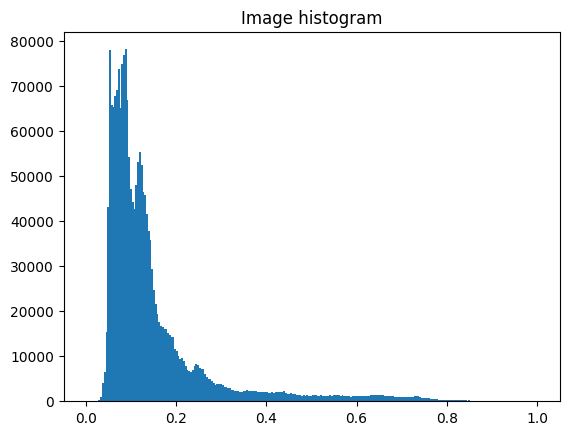

In [100]:
plt.hist(im_gray.ravel(), bins=256)
plt.title('Image histogram')
io.show()

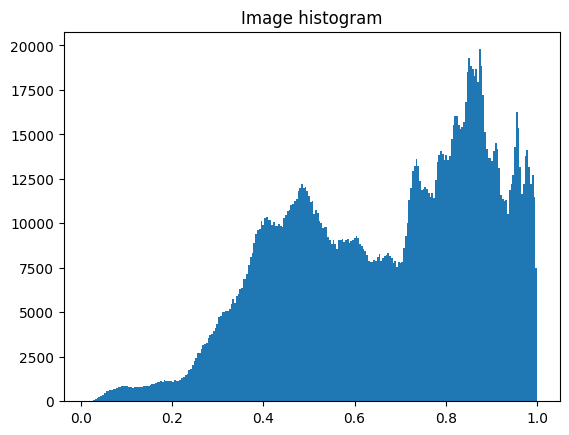

In [101]:
plt.hist(im_gray2.ravel(), bins=256)
plt.title('Image histogram')
io.show()

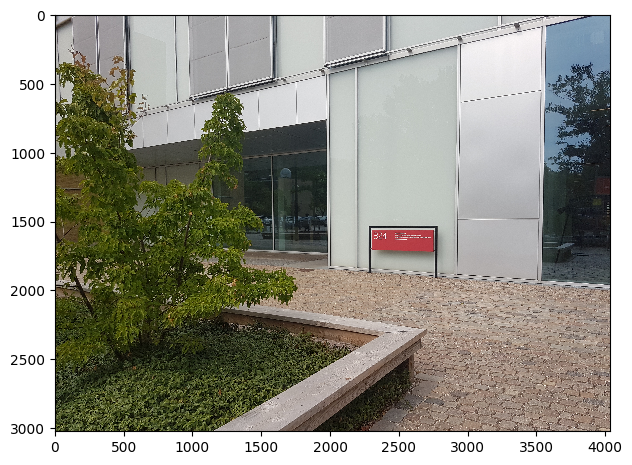

In [128]:
dtuim = io.imread('data/DTUSign1.jpg')
io.imshow(dtuim)

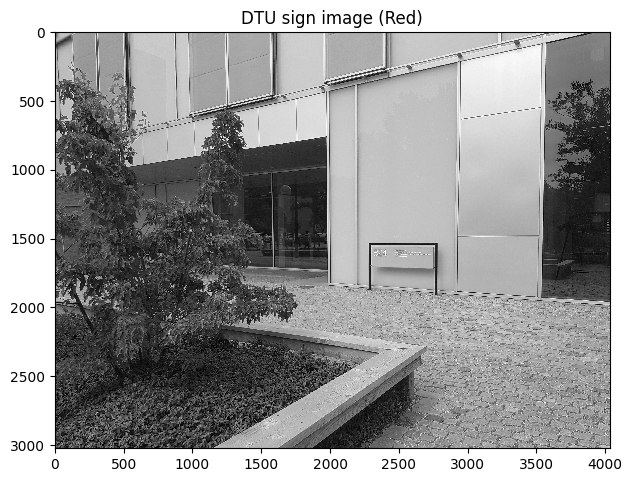

In [111]:
r_comp = dtuim[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

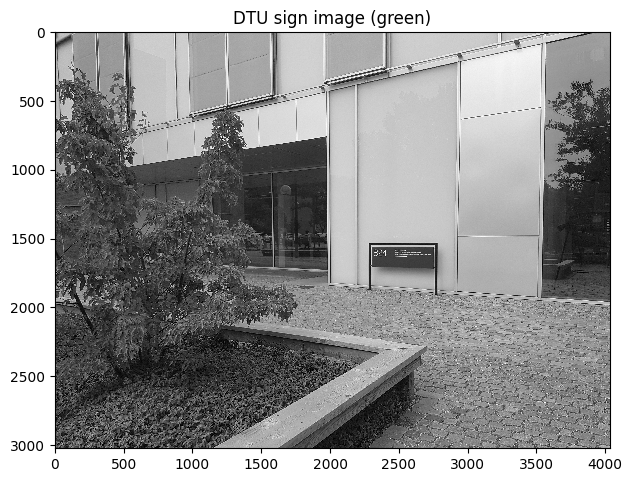

In [119]:
g_comp = dtuim[:, :,1]
io.imshow(g_comp)
plt.title('DTU sign image (green)')
io.show()

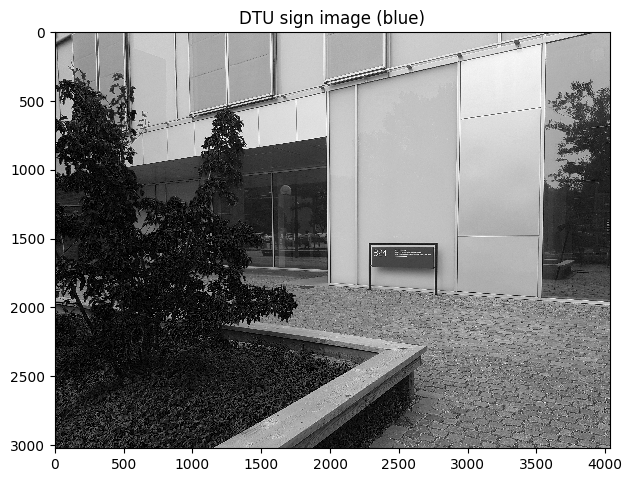

In [118]:
b_comp = dtuim[:, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (blue)')
io.show()

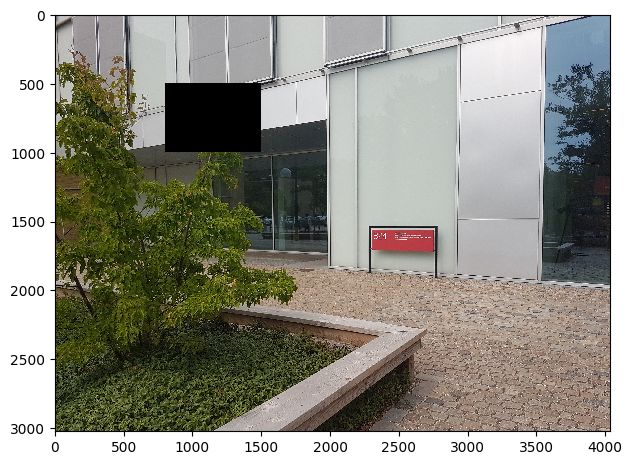

In [120]:
dtuim[500:1000, 800:1500, :] = 0
io.imshow(dtuim)

In [131]:
dtuim[1500:1750, 2200:2250, :] = (0,0,255)
dtuim[1500:1750, 2700:2750, :] = (0,0,255)
dtuim[1500:1550, 2200:2750, :] = (0,0,255)
dtuim[1700:1750, 2200:2750, :] = (0,0,255)

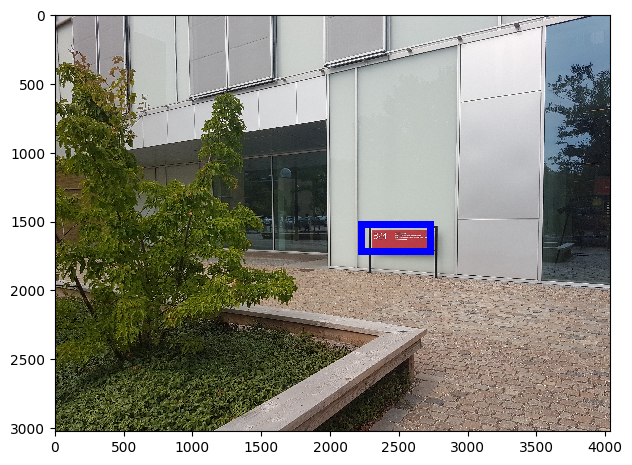

In [132]:
io.imshow(dtuim)

In [133]:
io.imsave('data/dtusign1-marked2.jpg', dtuim)

In [135]:
mate = io.imread('data/metacarpals.png')

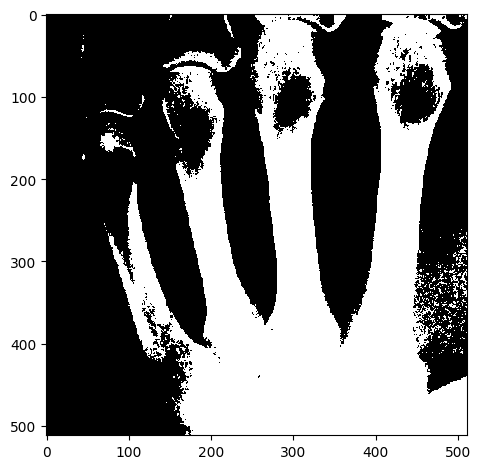

In [147]:
mask = mate>140
io.imshow(mask)

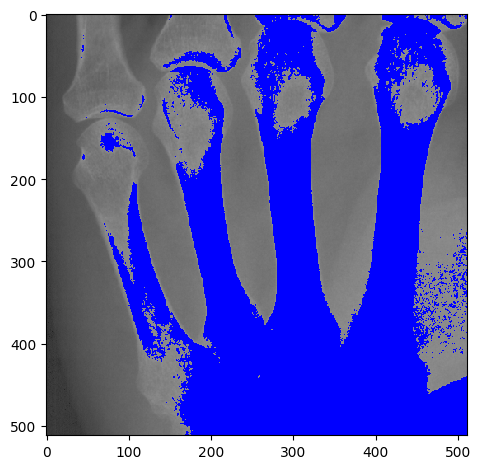

In [150]:
col = color.gray2rgb(mate)
col[mask] = (0,0,255)
io.imshow(col)

In [151]:
im_org = io.imread('data/metacarpals.png')

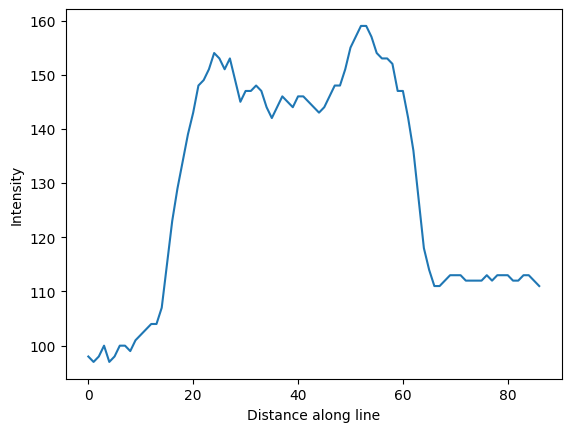

In [152]:
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

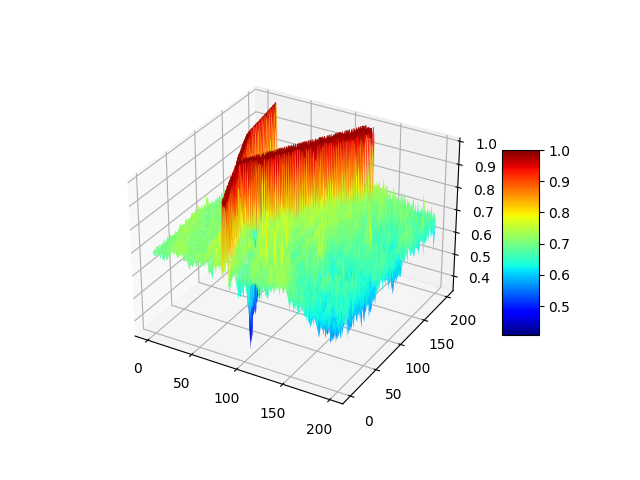

In [3]:
%matplotlib widget
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [196]:
labels = np.array(['calories','fat','carbohydrate','protein','fiber','sugar', 'iron', 'calcium','potassium'])
x = np.array([4,0,7,1,16,27,1,1,3]) # pears
y = np.array([3,0,6,1,11,26,1,1,3]) # apples
z = np.array([4,0,7,3,15,34,1,6,7]) # oranges

points = list(zip(x, y, z, labels))

Text(0.5, 0.98, 'Fruit comparison in % of daily value')

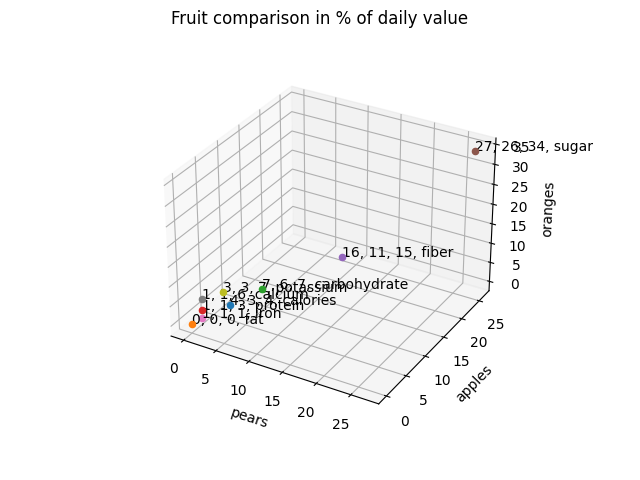

In [197]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pts in points:
    x = pts[0]
    y = pts[1]
    z = pts[2]
    label = f'{x}, {y}, {z}, {pts[3]}'
    ax.scatter(x, y, z)
    ax.text(x, y, z, label)

ax.set_xlabel('pears')
ax.set_ylabel('apples')
ax.set_zlabel('oranges')
fig.suptitle('Fruit comparison in % of daily value')

In [154]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

In [156]:
im = ds.pixel_array

In [157]:
im.shape

(512, 512)

In [158]:
im.dtype

dtype('int16')

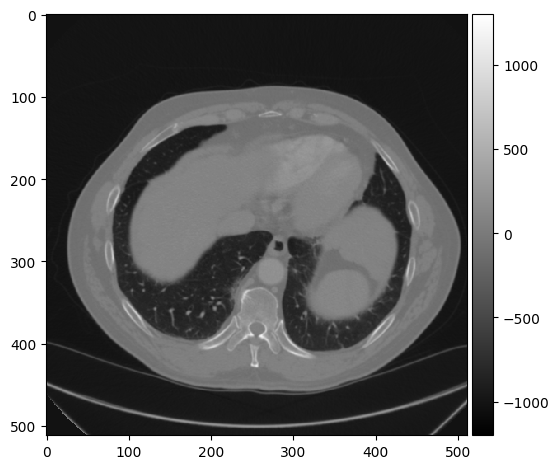

In [183]:
io.imshow(im, vmin=-1200, vmax=1300, cmap='gray')
io.show()